# <span style="color:green;">UAS Deep Learning</span>

# Zaneta Fransiske - 2702312146
## Case 2 - Dataset A_23

<span style="color: red; font-size: 19px;"> A. Exploratory Data Analysis (EDA)</span>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import random
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random
from tqdm import tqdm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Cropping2D, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from skimage.metrics import structural_similarity as ssim

In [2]:
data_path = r"C:\COOLYEAH\SEM 4\Deep Learning\UAS\A_23"
image_files = []
image_info = []
supported_formats = ['.jpg']

<span style="color: blue; font-size: 15px;"> Analisis Struktur Dataset</span>

In [3]:
for root, dirs, files in os.walk(data_path):
    for file in files:
        if any(file.lower().endswith(fmt) for fmt in supported_formats):
            image_files.append(os.path.join(root, file))

print(f"Ditemukan {len(image_files)} file gambar")

Ditemukan 1074 file gambar


In [4]:
for i, img_path in enumerate(image_files):
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            mode = img.mode
            format_img = img.format

            img_array = np.array(img)

            if len(img_array.shape) == 3:
                channels = img_array.shape[2]
            else:
                channels = 1

            mean_intensity = np.mean(img_array)
            std_intensity = np.std(img_array)
            min_intensity = np.min(img_array)
            max_intensity = np.max(img_array)

            file_size = os.path.getsize(img_path) / 1024  # KB

            image_info.append({
                'filename': os.path.basename(img_path),
                'width': width,
                'height': height,
                'channels': channels,
                'mode': mode,
                'format': format_img,
                'file_size_kb': file_size,
                'mean_intensity': mean_intensity,
                'std_intensity': std_intensity,
                'min_intensity': min_intensity,
                'max_intensity': max_intensity,
                'total_pixels': width * height
            })

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

    if (i + 1) % 100 == 0:
        print(f"Processed {i + 1}/{len(image_files)} images")

Processed 100/1074 images
Processed 200/1074 images
Processed 300/1074 images
Processed 400/1074 images
Processed 500/1074 images
Processed 600/1074 images
Processed 700/1074 images
Processed 800/1074 images
Processed 900/1074 images
Processed 1000/1074 images


In [5]:
df = pd.DataFrame(image_info)

In [6]:
print("Total gambar:", len(df))
print("Format gambar:", df['format'].value_counts().to_dict())
print("Mode warna:", df['mode'].value_counts().to_dict())

Total gambar: 1074
Format gambar: {'JPEG': 1074}
Mode warna: {'RGB': 1074}


<span style="color: blue; font-size: 15px;"> Distribusi Dimensi Gambar</span>

#### Statistik Dimensi

In [7]:
print("Statistik Width:", df['width'].describe())

Statistik Width: count    1074.0
mean      600.0
std         0.0
min       600.0
25%       600.0
50%       600.0
75%       600.0
max       600.0
Name: width, dtype: float64


#### Statistik Tinggi

In [8]:
print("Statistik Height:", df['height'].describe())

Statistik Height: count    1074.0
mean      600.0
std         0.0
min       600.0
25%       600.0
50%       600.0
75%       600.0
max       600.0
Name: height, dtype: float64


##### Scatter Plot Width vs Height

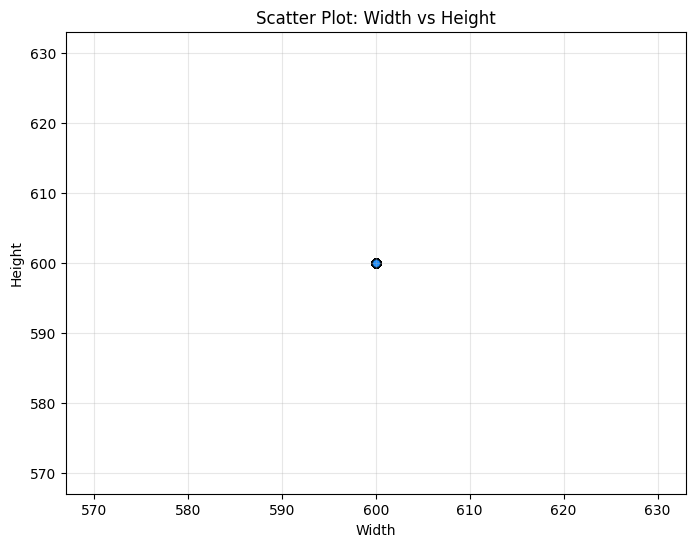

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['width'], df['height'], alpha=0.6, color='dodgerblue', edgecolors='k')

plt.title('Scatter Plot: Width vs Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True, alpha=0.3)
plt.show()

Plot menunjukkan hanya satu titik data yang sangat spesifik pada koordinat (600, 600). Ini secara jelas mengindikasikan bahwa semua citra dalam dataset memiliki dimensi yang seragam, yaitu 600x600 piksel.

##### Resolusi

In [10]:
resolutions = df.apply(lambda x: f"{x['width']}x{x['height']}", axis=1)
print("Resolusi:", resolutions.value_counts().head())

Resolusi: 600x600    1074
Name: count, dtype: int64


<span style="color: blue; font-size: 15px;"> Distribusi Jumlah Channel</span>

In [11]:
print("Distribusi Channel:", df['channels'].value_counts())

Distribusi Channel: channels
3    1074
Name: count, dtype: int64


##### Bar Plot Distribusi Channels

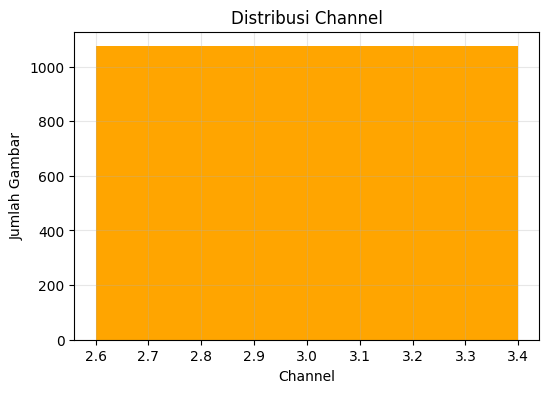

In [12]:
channel_counts = df['channels'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(channel_counts.index, channel_counts.values, color='orange')
plt.title('Distribusi Channel')
plt.xlabel('Channel')
plt.ylabel('Jumlah Gambar')
plt.grid(True, alpha=0.3)
plt.show()


Bar chart yang mencakup rentang 2.6 hingga 3.4 pada sumbu Channel dan tingginya mencapai maksimum pada sumbu Jumlah Gambar (sekitar 1100) secara kuat mengindikasikan bahwa semua gambar dalam dataset memiliki jumlah channel yang sama, yaitu 3.

<span style="color: blue; font-size: 15px;"> Analisis Intensitas Pixel</span>

#### Mean Intensity

In [13]:
print("Mean Intensity:\n", df['mean_intensity'].describe())

Mean Intensity:
 count    1074.000000
mean       47.803883
std         7.486154
min        20.899332
25%        42.594604
50%        47.962537
75%        53.260223
max        71.901263
Name: mean_intensity, dtype: float64


##### Histogram Mean Intensity

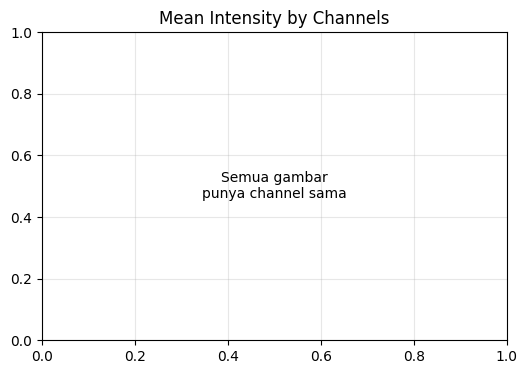

In [14]:
plt.figure(figsize=(6, 4))
if len(df['channels'].unique()) > 1:
    df.boxplot(column='mean_intensity', by='channels')
    plt.title('Mean Intensity by Channels')
    plt.suptitle('')
    plt.xlabel('Channels')
    plt.ylabel('Mean Intensity')
else:
    plt.text(0.5, 0.5, 'Semua gambar\npunya channel sama',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Mean Intensity by Channels')
plt.grid(True, alpha=0.3)
plt.show()


#### Std Intensity

In [15]:
print("Std Intensity:", df['std_intensity'].describe())

Std Intensity: count    1074.000000
mean       86.517957
std         7.073770
min        55.951581
25%        82.171433
50%        87.222017
75%        91.674922
max       103.869830
Name: std_intensity, dtype: float64


##### Histogram Std Intensity

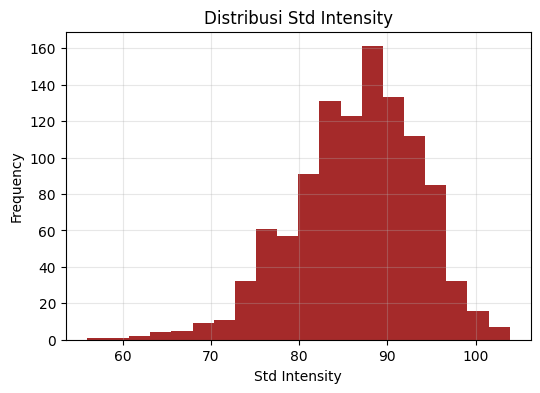

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(df['std_intensity'], bins=20, color='brown')
plt.title('Distribusi Std Intensity')
plt.xlabel('Std Intensity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


Distribusi deviasi standar intensitas terlihat menyerupai distribusi normal atau sedikit condong ke kiri (negative skew).

Mayoritas citra memiliki nilai Std Intensity antara 80 dan 95.

Puncak distribusi berada di sekitar 88-89. Ini menunjukkan bahwa sebagian besar citra dalam dataset memiliki tingkat variasi intensitas piksel yang moderat hingga tinggi.

Ada beberapa citra dengan deviasi standar yang lebih rendah (mulai dari sekitar 55-60) dan beberapa yang lebih tinggi (hingga sekitar 100-105), tetapi frekuensinya lebih sedikit.

<span style="color: blue; font-size: 15px;"> Analisis Ukuran File</span>

In [17]:
print("Ukuran file (KB):", df['file_size_kb'].describe())

Ukuran file (KB): count    1074.000000
mean       16.248153
std         2.988797
min        10.472656
25%        14.119141
50%        15.509277
75%        17.531738
max        28.468750
Name: file_size_kb, dtype: float64


##### Histogram Ukuran File

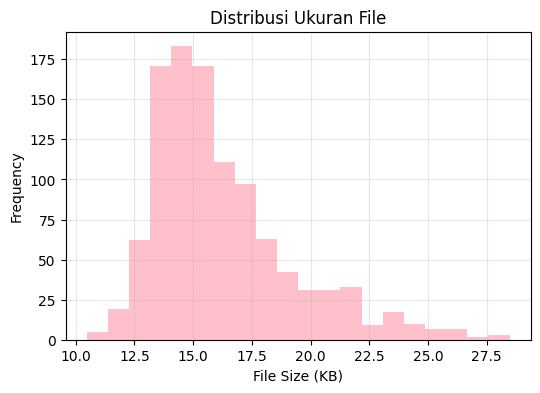

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(df['file_size_kb'], bins=20, color='pink')
plt.title('Distribusi Ukuran File')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


Distribusi ukuran file sebagian besar terkonsentrasi antara 12 KB dan 20 KB.

Puncak tertinggi (mode) distribusi berada di sekitar 14-15 KB, menunjukkan bahwa sebagian besar citra dalam dataset memiliki ukuran file di kisaran tersebut.

Distribusi ini cenderung agak condong ke kanan (positive skew), dengan beberapa citra berukuran lebih besar (hingga sekitar 27-28 KB) tetapi dengan frekuensi yang lebih rendah.

<span style="color: blue; font-size: 15px;"> Analisis Korelasi</span>

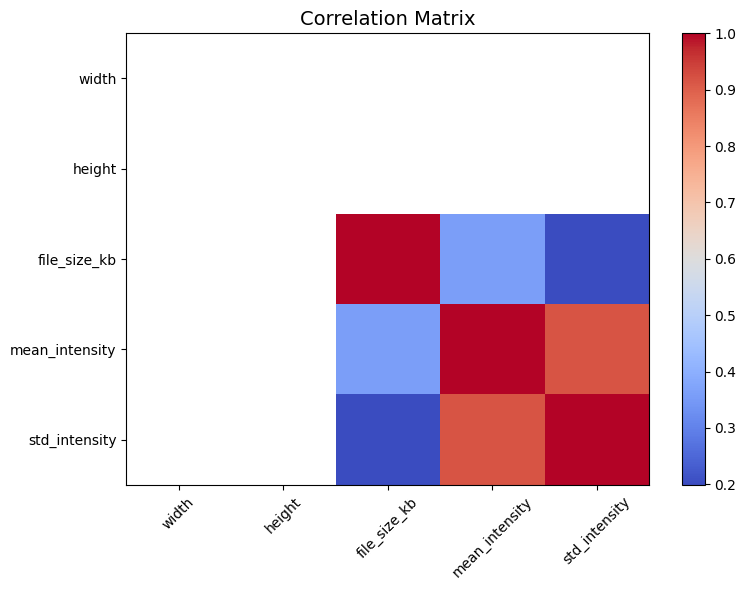

In [19]:
numeric_cols = ['width', 'height', 'file_size_kb', 'mean_intensity', 'std_intensity']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.xticks(ticks=np.arange(len(numeric_cols)), labels=numeric_cols, rotation=45)
plt.yticks(ticks=np.arange(len(numeric_cols)), labels=numeric_cols)
plt.title('Correlation Matrix', fontsize=14)
plt.colorbar(im)
plt.tight_layout()
plt.show()

`file_size_kb versus mean_intensity:`
Sel pada (file_size_kb, mean_intensity) berwarna biru muda. Ini menunjukkan korelasi positif yang lemah atau kemungkinan korelasi yang sangat rendah antara ukuran file dan intensitas rata-rata. Ini mengindikasikan bahwa seiring dengan peningkatan intensitas rata-rata, ukuran file mungkin sedikit meningkat, tetapi hubungannya tidak kuat.

`file_size_kb versus std_intensity:`
Sel pada (file_size_kb, std_intensity) berwarna biru yang lebih gelap, serupa dengan file_size_kb versus mean_intensity tetapi mungkin sedikit lebih gelap. Ini juga menunjukkan korelasi positif yang lemah antara ukuran file dan deviasi standar intensitas. Deviasi standar yang lebih tinggi (lebih banyak variasi dalam intensitas piksel) mungkin menghasilkan ukuran file yang sedikit lebih besar.

`mean_intensity versus std_intensity:`
Sel pada (mean_intensity, std_intensity) berwarna merah kuat. Ini menunjukkan korelasi positif yang kuat. Gambar dengan intensitas piksel rata-rata yang lebih tinggi cenderung juga memiliki deviasi standar intensitas piksel yang lebih tinggi. Ini bisa berarti bahwa gambar yang lebih cerah seringkali memiliki rentang nilai piksel yang lebih luas, atau mungkin gambar dengan intensitas tinggi lebih mungkin mengandung tingkat intensitas yang beragam.

<span style="color: blue; font-size: 15px;"> Visual Sample Gambar</span>

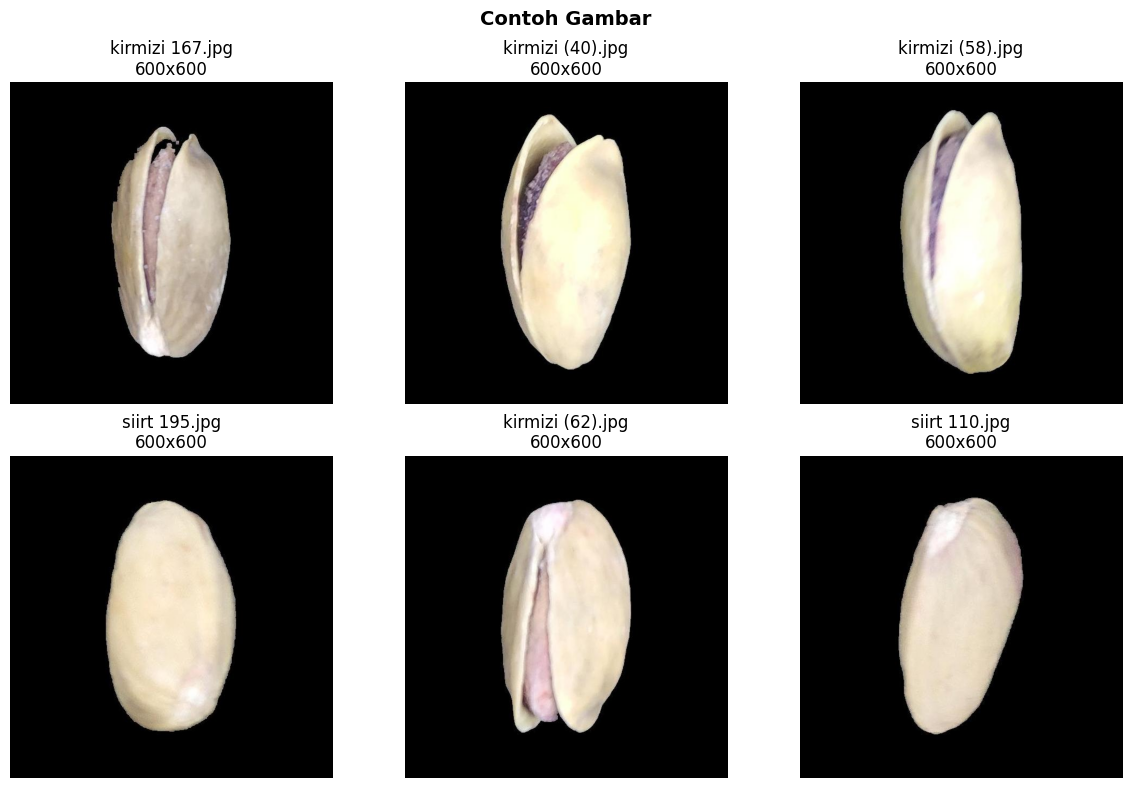

In [20]:
sample_files = random.sample(image_files, min(6, len(image_files)))

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Contoh Gambar', fontsize=14, fontweight='bold')

for i, img_path in enumerate(sample_files):
    row = i // 3
    col = i % 3
    try:
        img = Image.open(img_path)
        axes[row, col].imshow(img)
        axes[row, col].set_title(f'{os.path.basename(img_path)}\n{img.size[0]}x{img.size[1]}')
        axes[row, col].axis('off')
    except:
        axes[row, col].text(0.5, 0.5, 'Error loading image',
                            ha='center', va='center', transform=axes[row, col].transAxes)
        axes[row, col].set_title('Error')

plt.tight_layout()
plt.show()

**EDA YANG DILAKUKAN:**

`1. ANALISIS STRUKTUR DATASET`
   - Menghitung total jumlah gambar
   - Mengidentifikasi format file (JPG, PNG, dll.)
   - Menganalisis mode warna (RGB, Grayscale, dll.)
   
   ALASAN: Memahami komposisi dataset untuk menentukan preprocessing yang tepat

`2. ANALISIS DIMENSI GAMBAR`
   - Distribusi width dan height
   - Identifikasi resolusi yang paling umum
   - Scatter plot width vs height
   
   ALASAN: Menentukan target resize (100x100) dan memahami variasi ukuran

`3. ANALISIS JUMLAH CHANNEL`
   - Distribusi gambar berdasarkan jumlah channel
   
   ALASAN: Menentukan arsitektur model (input layer harus sesuai channel)

`4. ANALISIS INTENSITAS PIXEL`
   - Mean dan standard deviation intensitas pixel
   - Range nilai pixel (min-max)
   
   ALASAN: Menentukan strategi normalisasi dan memahami karakteristik brightness

`5. ANALISIS UKURAN FILE`
   - Distribusi ukuran file dalam KB
   
   ALASAN: Memahami kompleksitas gambar dan kebutuhan storage

`6. ANALISIS KORELASI`
   - Korelasi antar variabel numerik
   
   ALASAN: Memahami hubungan antar fitur untuk optimasi preprocessing

`7. VISUALISASI SAMPLE GAMBAR`
   - Menampilkan sample gambar acak
   
   ALASAN: Visual inspection untuk memahami konten dan kualitas dataset


<span style="color: red; font-size: 19px;"> B. Preprocessing</span>

Berdasarkan hasil EDA, berikut adalah langkah-langkah Data Preprocessing yang perlu dilakukan:

`1. Resize Gambar` ke: (100,100)

`2. Normalisasi` ke rentang [0,1]

`3. Data Split` 80% training, 10% validasi, dan 10% testing

`4. Menambahkan Gaussian Noise` (μ=0.0, σ=0.1)

<span style="color: blue; font-size: 15px;"> Resize Gambar dan Normalisasi</span>

In [21]:
target_size = (100, 100)
mean = 0.0
std = 0.1
clean_images = []
noisy_images = []

In [22]:
for img_path in tqdm(image_files, desc="Processing images"):
    try:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        img_normalized = img_array / 255.0
        
        noise = np.random.normal(mean, std, img_normalized.shape)
        noisy_img = np.clip(img_normalized + noise, 0.0, 1.0)

        clean_images.append(img_normalized)
        noisy_images.append(noisy_img)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

clean_images = np.array(clean_images)
noisy_images = np.array(noisy_images)

print(f"Clean images shape: {clean_images.shape}")
print(f"Noisy images shape: {noisy_images.shape}")

Processing images: 100%|██████████████████████████████████████████████████████████| 1074/1074 [00:03<00:00, 346.72it/s]


Clean images shape: (1074, 100, 100, 3)
Noisy images shape: (1074, 100, 100, 3)


<span style="color: blue; font-size: 15px;">Data Split (Training, Validasi, Testing)</span>

Membagi training (80%) dan temp (20%) lalu bagi temp menjadi validasi (10%) dan testing (10%) dari total data

In [23]:
X_train, X_temp, _, _ = train_test_split(
    clean_images, clean_images, test_size=0.2, random_state=42
)

X_val, X_test, _, _ = train_test_split(
    X_temp, X_temp, test_size=0.5, random_state=42
)

print(f"Jumlah gambar Training: {len(X_train)}")
print(f"Jumlah gambar Validasi: {len(X_val)}")
print(f"Jumlah gambar Testing: {len(X_test)}")


Jumlah gambar Training: 859
Jumlah gambar Validasi: 107
Jumlah gambar Testing: 108


<span style="color: blue; font-size: 15px;">Pembuatan Data dengan Noise</span>

In [24]:
def add_gaussian_noise(image_array, mean=0.0, std_dev=0.1):
    noise = np.random.normal(mean, std_dev, image_array.shape)
    noisy_image = image_array + noise

    noisy_image = np.clip(noisy_image, 0.0, 1.0)
    return noisy_image

X_train_noisy = add_gaussian_noise(X_train, mean=0.0, std_dev=0.1)
X_val_noisy = add_gaussian_noise(X_val, mean=0.0, std_dev=0.1)
X_test_noisy = add_gaussian_noise(X_test, mean=0.0, std_dev=0.1)

print(f"Shape X_train_noisy: {X_train_noisy.shape}")
print(f"Shape X_val_noisy: {X_val_noisy.shape}")
print(f"Shape X_test_noisy: {X_test_noisy.shape}")

Shape X_train_noisy: (859, 100, 100, 3)
Shape X_val_noisy: (107, 100, 100, 3)
Shape X_test_noisy: (108, 100, 100, 3)


<span style="color: blue; font-size: 15px;">Visualisasi Gambar Clean vs Noise</span>

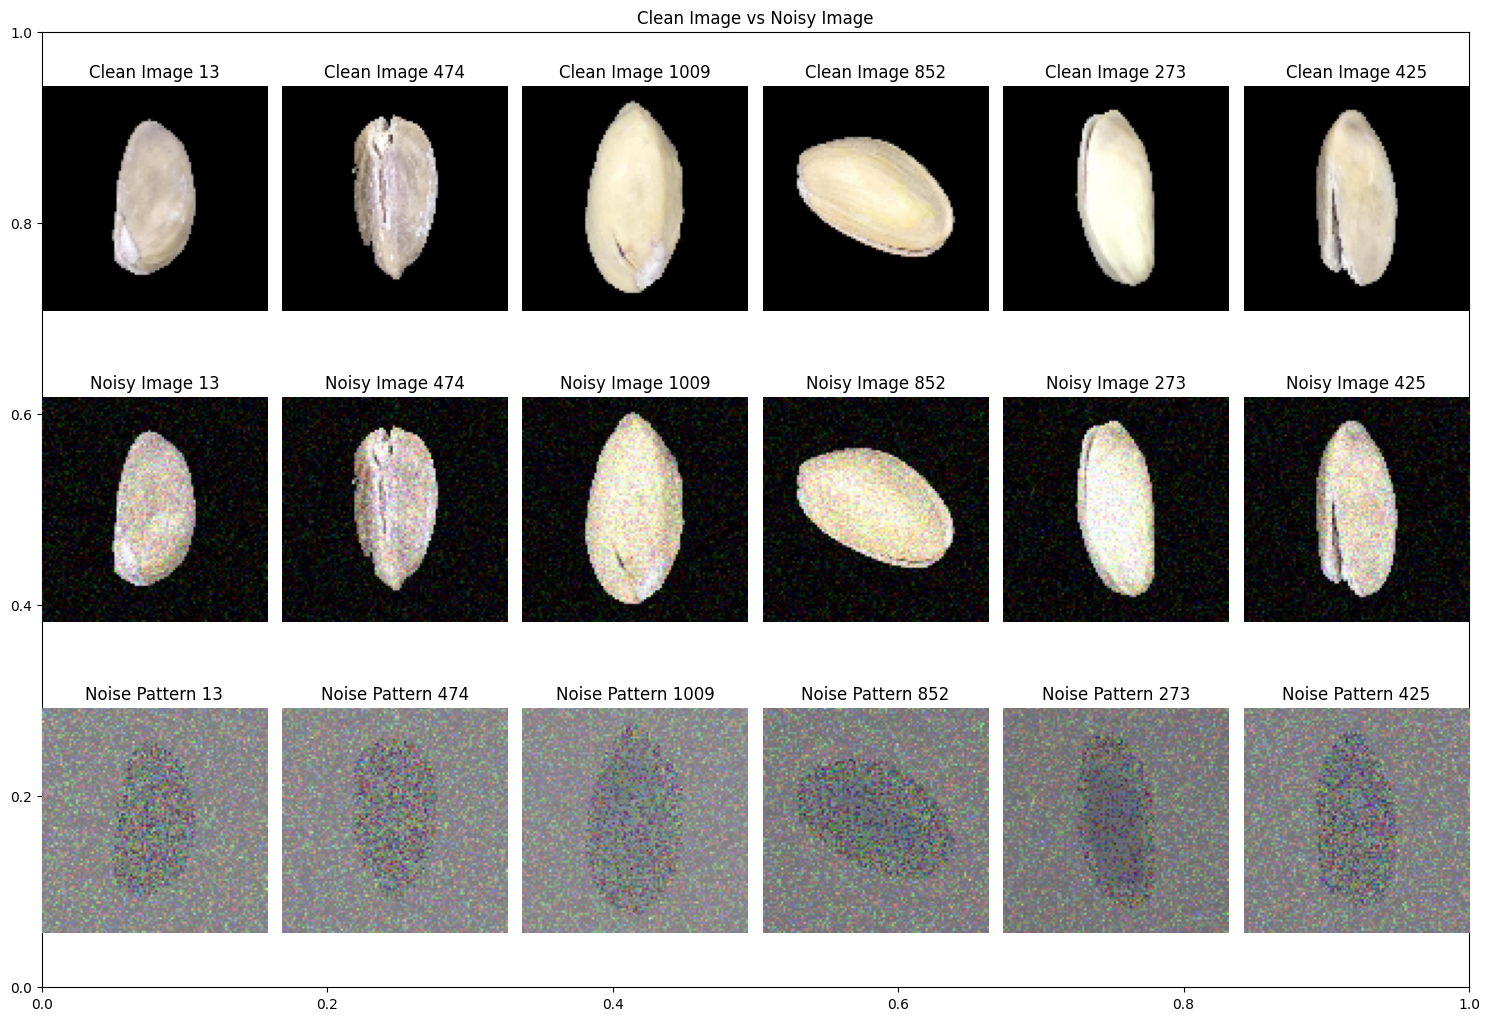

In [25]:
num_samples = 6 
indices = np.random.choice(len(clean_images), num_samples, replace=False)

plt.figure(figsize=(15, 10))
plt.title("Clean Image vs Noisy Image")

for i, idx in enumerate(indices):
    plt.subplot(3, num_samples, i + 1)
    plt.imshow(clean_images[idx])
    plt.title(f'Clean Image {idx}')
    plt.axis('off')

    plt.subplot(3, num_samples, i + 1 + num_samples)
    plt.imshow(noisy_images[idx])
    plt.title(f'Noisy Image {idx}')
    plt.axis('off')

    plt.subplot(3, num_samples, i + 1 + 2*num_samples)
    noise_diff = noisy_images[idx] - clean_images[idx]

    noise_diff = (noise_diff - noise_diff.min()) / (noise_diff.max() - noise_diff.min())
    plt.imshow(noise_diff)
    plt.title(f'Noise Pattern {idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<span style="color: blue; font-size: 15px;">Statistik Noise</span>

In [26]:
actual_noise = noisy_images - clean_images
print(f"Noise mean: {np.mean(actual_noise):.6f}")
print(f"Noise std: {np.std(actual_noise):.6f}")
print(f"Noise min: {np.min(actual_noise):.6f}")
print(f"Noise max: {np.max(actual_noise):.6f}")

Noise mean: 0.028976
Noise std: 0.071102
Noise min: -0.552742
Noise max: 0.533494


##### Visualisasi 

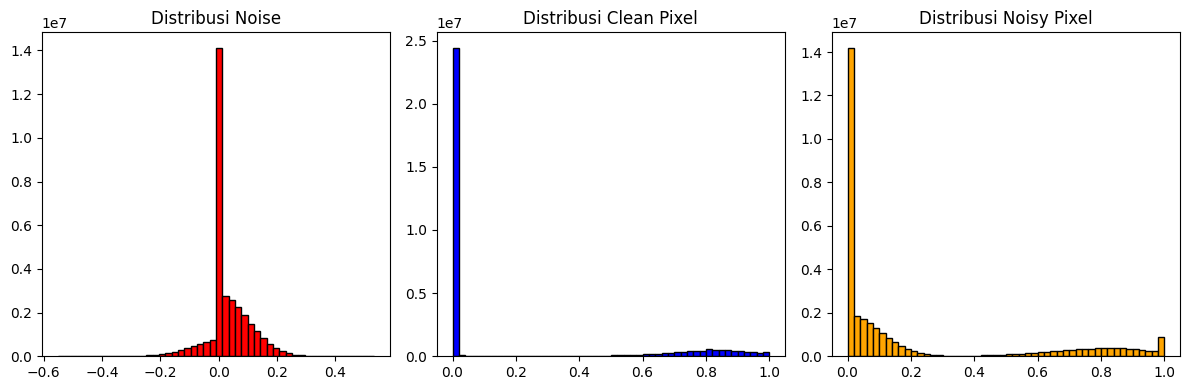

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(actual_noise.flatten(), bins=50, color='red', edgecolor='black')
plt.title("Distribusi Noise")

plt.subplot(1, 3, 2)
plt.hist(clean_images.flatten(), bins=50, color='blue', edgecolor='black')
plt.title("Distribusi Clean Pixel")

plt.subplot(1, 3, 3)
plt.hist(noisy_images.flatten(), bins=50, color='orange', edgecolor='black')
plt.title("Distribusi Noisy Pixel")
plt.tight_layout()
plt.show()

`Distribusi Noise (Histogram Merah):`
Noise ini cukup terdistribusi secara merata di sekitar nol, dengan sebagian besar nilainya berada dalam rentang kecil. 

`Distribusi Clean Pixel (Histogram Biru):`
Citra bersih yang digunakan mungkin sebagian besar gelap atau memiliki banyak latar belakang hitam/nilai piksel rendah. Kehadiran nilai di dekat 1.0 menunjukkan objek atau area terang dalam citra bersih tersebut.

`Distribusi Noisy Pixel (Histogram Oranye):`
Puncak di dekat 0.0 kemungkinan besar berasal dari piksel bersih yang awalnya 0.0, yang kemudian sedikit bergeser karena penambahan noise (baik positif maupun negatif, tetapi sebagian besar masih di sekitar 0.0).

Puncak di sekitar 1.0 kemungkinan besar berasal dari piksel bersih yang awalnya 1.0, yang juga sedikit bergeser karena penambahan noise.

Penyebaran nilai di antara 0.0 dan 1.0 menunjukkan efek noise pada piksel-piksel yang awalnya memiliki nilai antara kedua ekstrem tersebut, atau hasil dari noise yang mendorong nilai piksel yang awalnya dekat 0.0 atau 1.0 menjauh dari nilai aslinya.

<span style="color: red; font-size: 19px;"> C. Build Baseline Deep Learning Autoencoder Model</span>

In [28]:
def build_autoencoder_baseline():
    
    #Input Layer
    input_img = Input(shape=(100, 100, 3), name='input_layer')

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d')(input_img)
    x = MaxPooling2D((2, 2), padding='same', name='max_pooling2d')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1')(x)
    x = MaxPooling2D((2, 2), padding='same', name='max_pooling2d_1')(x)
    
    # Bottleneck (latent space)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_2')(x)

    # Decoder
    x = UpSampling2D((2, 2), name='up_sampling2d')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_3')(x)
    x = UpSampling2D((2, 2), name='up_sampling2d_1')(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='conv2d_4')(x) # Output layer

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse',metrics=['mae'])
    
    return autoencoder

autoencoder_baseline = build_autoencoder_baseline()
autoencoder_baseline.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

##### Training Model Baseline

In [29]:
history_baseline = autoencoder_baseline.fit(
    X_train_noisy, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_val_noisy, X_val)
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.1304 - mae: 0.3105 - val_loss: 0.0106 - val_mae: 0.0424
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 0.0098 - mae: 0.0407 - val_loss: 0.0073 - val_mae: 0.0330
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0058 - mae: 0.0296 - val_loss: 0.0041 - val_mae: 0.0244
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 0.0040 - mae: 0.0238 - val_loss: 0.0036 - val_mae: 0.0223
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0035 - mae: 0.0217 - val_loss: 0.0032 - val_mae: 0.0200
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - loss: 0.0031 - mae: 0.0196 - val_loss: 0.0029 - val_mae: 0.0185
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - loss: 0.0029 - mae: 0.0184 - val_loss: 0.0027 - val_mae: 0.0175
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0026 - mae: 0.0174 - val_loss: 0.0025 - val_mae: 0.0171
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - lo

#### Evaluasi Model Baseline

In [30]:
test_loss, test_mae = autoencoder_baseline.evaluate(X_test_noisy, X_test, verbose=0)

print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"Test RMSE: {np.sqrt(test_loss):.6f}")


Test Loss (MSE): 0.001089
Test MAE: 0.010589
Test RMSE: 0.033006


Model autoencoder baseline menunjukkan kinerja yang sangat baik dalam membersihkan noise dari citra. Ini terlihat dari nilai Test Loss (MSE) sebesar 0.001089, yang merupakan nilai kesalahan kuadrat rata-rata yang sangat rendah, mengindikasikan bahwa perbedaan antara citra bersih asli dan citra yang direkonstruksi oleh model setelah denoising sangat kecil.

Selanjutnya, Test MAE (Mean Absolute Error) sebesar 0.010589 juga sangat rendah, menunjukkan bahwa rata-rata selisih absolut antara nilai piksel pada citra asli dan citra hasil prediksi model juga sangat kecil, menandakan akurasi yang tinggi dalam rekonstruksi piksel. 

Terakhir, Test RMSE (Root Mean Squared Error) sebesar 0.033006.  RMSE yang rendah ini menegaskan bahwa kesalahan rata-rata akar, yang lebih sensitif terhadap error besar, juga sangat kecil.

##### Plot Loss

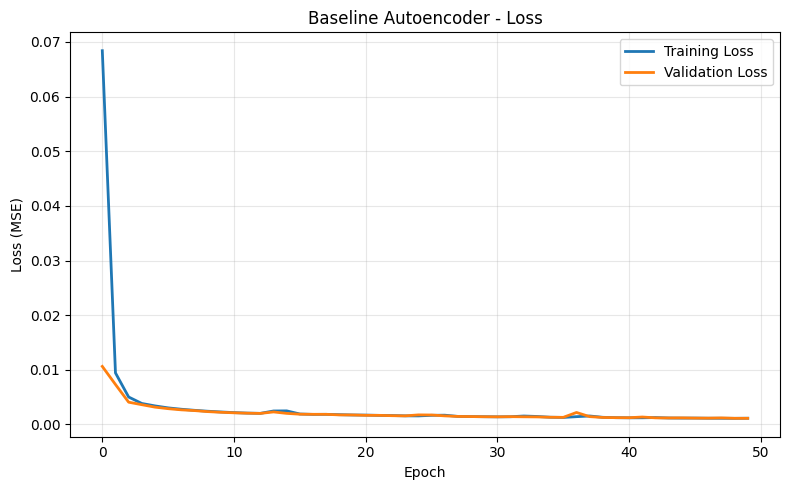

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(history_baseline.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_baseline.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Baseline Autoencoder - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Pada awal pelatihan (epoch-epoch pertama, sekitar 0-5), terlihat penurunan loss yang sangat drastis dan cepat untuk kedua kurva, baik training loss maupun validation loss. Ini menunjukkan bahwa model dengan cepat mempelajari pola dasar untuk membersihkan noise pada tahap awal.

Setelah penurunan awal yang cepat, kedua kurva loss terus menurun, namun dengan kecepatan yang jauh lebih lambat, dan kemudian mulai mendatar (konvergen) setelah sekitar epoch ke-10 hingga akhir pelatihan (epoch ke-49). Nilai loss mencapai angka yang sangat rendah, mendekati nol, menunjukkan bahwa model berhasil meminimalkan kesalahan rekonstruksi.

##### Plot MAE

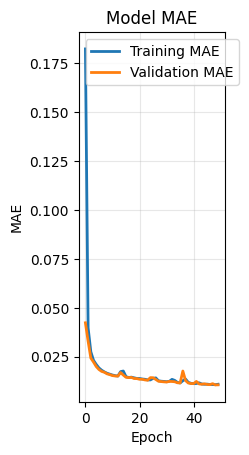

In [32]:
plt.subplot(1, 3, 2)
plt.plot(history_baseline.history['mae'], label='Training MAE', linewidth=2)
plt.plot(history_baseline.history['val_mae'], label='Validation MAE', linewidth=2)
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

Sama seperti loss, pada epoch-epoch awal (sekitar 0 hingga 5), terjadi penurunan MAE yang sangat tajam dan signifikan untuk kedua kurva. Ini menunjukkan bahwa model dengan cepat mengurangi rata-rata kesalahan absolut dalam memprediksi nilai piksel selama tahap awal pelatihan.

Setelah penurunan awal, MAE terus menurun secara bertahap dan kemudian mendatar, menunjukkan konvergensi. Kedua kurva MAE (training dan validation) menjadi sangat stabil dan menunjukkan nilai yang sangat rendah setelah sekitar epoch ke-15 hingga akhir pelatihan (epoch ke-49).

Penurunan MAE yang cepat, konvergensi ke nilai yang sangat rendah, dan keselarasan antara training MAE dan validation MAE menunjukkan bahwa model telah belajar dengan baik, memiliki kemampuan generalisasi yang kuat, dan **tidak menunjukkan tanda-tanda overfitting**. Ini berarti model dapat membersihkan noise dari citra baru (yang belum pernah dilihat sebelumnya) dengan tingkat akurasi yang tinggi.

##### Plot Best Epoch

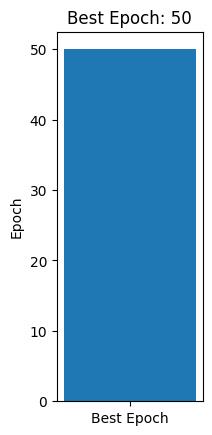

In [33]:
plt.subplot(1, 3, 3)
if 'lr' in history_baseline.history:
    plt.plot(history_baseline.history['lr'], linewidth=2, color='red')
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
else:
    best_epoch = np.argmin(history_baseline.history['val_loss'])
    plt.bar(['Best Epoch'], [best_epoch + 1])
    plt.title(f'Best Epoch: {best_epoch + 1}')
    plt.ylabel('Epoch')


Angka 50 sebagai best epoch menunjukkan bahwa model terus membaik atau setidaknya mempertahankan kinerja terbaiknya hingga akhir dari 50 epoch pelatihan yang dijalankan. Ini berarti seluruh durasi pelatihan yang ditentukan telah dimanfaatkan secara efektif.

##### Baseline Model Visual Compare: Noisy vs Clean vs Reconstructed 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


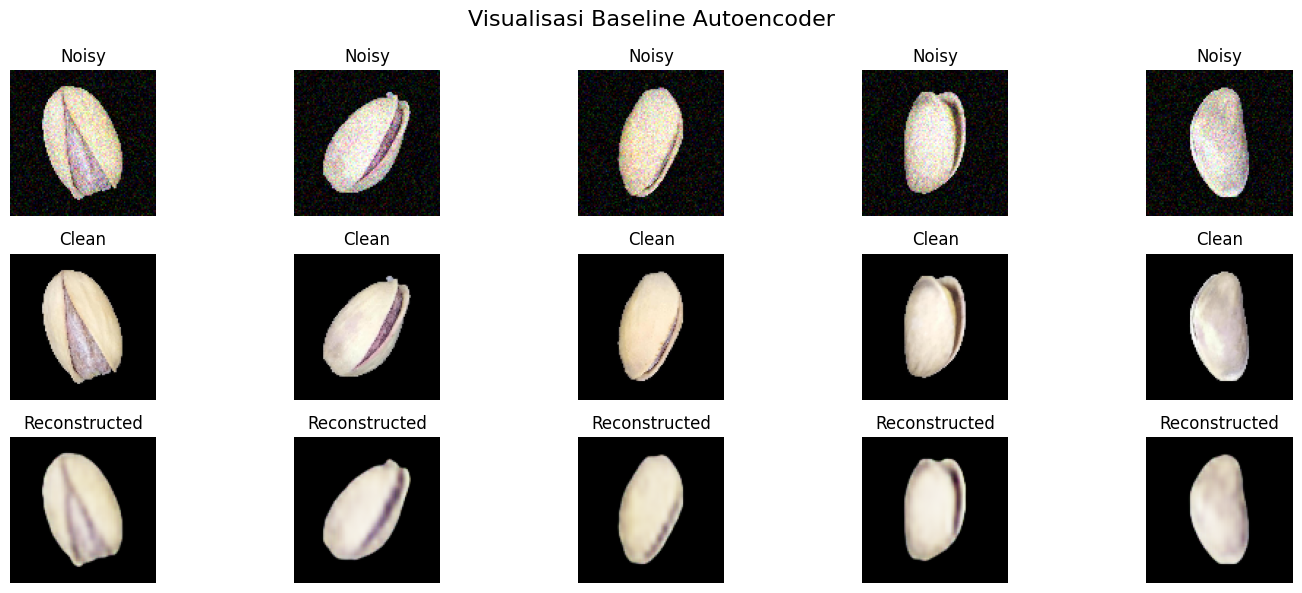

In [34]:
num_samples = 5
sample_idxs = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(sample_idxs):
    plt.subplot(3, num_samples, i + 1)
    plt.imshow(X_test_noisy[idx])
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(3, num_samples, i + 1 + num_samples)
    plt.imshow(X_test[idx])
    plt.title("Clean")
    plt.axis("off")

    reconstructed = autoencoder_baseline.predict(np.expand_dims(X_test_noisy[idx], axis=0))[0]
    plt.subplot(3, num_samples, i + 1 + 2 * num_samples)
    plt.imshow(reconstructed)
    plt.title("Reconstructed")
    plt.axis("off")

plt.suptitle("Visualisasi Baseline Autoencoder", fontsize=16)
plt.tight_layout()
plt.show()


Visualisasi ini mendukung hasil evaluasi numerik (MSE, MAE, RMSE) yang rendah sebelumnya. Model autoencoder baseline terbukti sangat efektif dan efisien dalam membersihkan noise dari citra biji-bijian. Output yang direkonstruksi sangat menyerupai citra bersih aslinya, menunjukkan bahwa model berhasil mempelajari representasi data yang mendasari dan mampu mengeliminasi gangguan yang disebabkan oleh noise secara akurat tanpa mengorbankan kualitas atau detail citra. 

<span style="color: red; font-size: 19px;"> D. Modification Model</span>

#### Modifikasi yang Dilakukan:

##### 1. Penambahan Jumlah Filter

       Pada arsitektur modified, jumlah filter diperbesar dari 32–64 (baseline) menjadi 64–128–256. Hal ini memungkinkan model menangkap fitur yang lebih kompleks, terutama untuk noise level tinggi.

##### 2. Penambahan Lapisan Bottleneck

        Bottleneck diperluas dengan dua lapisan Conv2D(256) berturut-turut. Ini meningkatkan kedalaman representasi laten sehingga model mampu memahami informasi yang lebih abstrak dari citra input.

##### 3. Penggantian UpSampling dengan Conv2DTranspose

        Baseline menggunakan UpSampling2D (interpolasi statis), sedangkan modified menggunakan Conv2DTranspose yang mampu belajar proses upsampling yang optimal, sehingga hasil rekonstruksi menjadi lebih detail dan halus.

##### 4. Penambahan Lapisan Refinement

        Setelah proses upsampling, ditambahkan Conv2D tambahan sebagai lapisan refinemen untuk menyempurnakan hasil rekonstruksi di setiap tahap decoder.

##### 5. Peningkatan Kedalaman Jaringan

        Arsitektur modified memiliki lebih banyak lapisan dibanding baseline (9+ layer vs. 5 layer). Ini memberikan kapasitas pembelajaran yang lebih dalam untuk memproses fitur spasial dan noise.

##### 6. Struktur Encoder-Decoder yang Simetris dan Lebih Kompleks

        Struktur encoder-decoder dirancang lebih simetris dengan penambahan dan pemadatan fitur yang berlapis-lapis. Hal ini memperkuat konsistensi pembelajaran dari input ke output.

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Cropping2D
from tensorflow.keras.models import Model

def build_autoencoder_modified():
    input_img = Input(shape=(100, 100, 3), name='input_layer_mod')
   
    # Layer 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_enc_1_mod')(input_img) 
    x = MaxPooling2D((2, 2), padding='same', name='pool_enc_1_mod')(x)                       
    
    # Layer 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_enc_2_mod')(x)     
    encoded = MaxPooling2D((2, 2), padding='same', name='pool_enc_2_v3')(x)                
    
    # Bottleneck
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='bottleneck_conv_1_mod')(encoded) 
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='bottleneck_conv_2_mod')(x) 

    # Decoder 
    # Layer 1
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same', name='conv_dec_1_mod')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='refine_conv_1_mod')(x) 
    
    # Layer 2
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same', name='conv_dec_2_mod')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='refine_conv_2_mod')(x) 
    
    # Output Layer
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='output_conv_mod')(x) 

    autoencoder_modified = Model(input_img, decoded)
    autoencoder_modified.compile(optimizer='adam', loss='mse',metrics=['mae'])
    
    return autoencoder_modified

autoencoder_modified = build_autoencoder_modified()
autoencoder_modified.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_mod (InputLayer)         │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_enc_1_mod (Conv2D)              │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_enc_1_mod (MaxPooling2D)        │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_enc_2_mod (Conv2D)              │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_enc_2_v3 (MaxPooling2D)         │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck_conv_1_mod (Conv2D)       │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck_conv_2_mod (Conv2D)       │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dec_1_mod (Conv2DTranspose)     │ (None, 50, 50, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ refine_conv_1_mod (Conv2D)           │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dec_2_mod (Conv2DTranspose)     │ (None, 100, 100, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ refine_conv_2_mod (Conv2D)           │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_conv_mod (Conv2D)             │ (None, 100, 100, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,515,971 (5.78 MB)

 Trainable params: 1,515,971 (5.78 MB)

 Non-trainable params: 0 (0.00 B)

##### Training model modifikasi

In [36]:
history_modified = autoencoder_modified.fit(
    X_train_noisy, X_train,
    epochs=50, 
    batch_size=32,
    shuffle=True,
    validation_data=(X_val_noisy, X_val)
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 0.1231 - mae: 0.2788 - val_loss: 0.0068 - val_mae: 0.0324
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - loss: 0.0053 - mae: 0.0254 - val_loss: 0.0041 - val_mae: 0.0217
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - loss: 0.0040 - mae: 0.0214 - val_loss: 0.0036 - val_mae: 0.0210
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - loss: 0.0036 - mae: 0.0209 - val_loss: 0.0031 - val_mae: 0.0194
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - loss: 0.0031 - mae: 0.0195 - val_loss: 0.0026 - val_mae: 0.0177
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - loss: 0.0027 - mae: 0.0178 - val_loss: 0.0022 - val_mae: 0.0157
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - loss: 0.0022 - mae: 0.0161 - val_loss: 0.0022 - val_mae: 0.0155
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - loss: 0.0021 - mae: 0.0156 - val_loss: 0.0019 - val_mae: 0.0144
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - loss: 0.0019 - mae: 

#### Evaluasi Model Modifikasi

In [37]:
test_loss_mod, test_mae_mod = autoencoder_modified.evaluate(X_test_noisy, X_test, verbose=0)

print(f"Test Loss (MSE): {test_loss_mod:.6f}")
print(f"Test MAE: {test_mae_mod:.6f}")
print(f"Test RMSE: {np.sqrt(test_loss_mod):.6f}")


Test Loss (MSE): 0.000763
Test MAE: 0.009628
Test RMSE: 0.027620


Model autoencoder yang telah dimodifikasi menunjukkan peningkatan kinerja yang signifikan dalam tugas pembersihan noise pada citra dibandingkan dengan model baseline. 

`Test Loss (MSE) 0.000763:` Angka ini hampir separuh dari MSE model baseline (0.001089). Penurunan dalam Mean Squared Error ini mengindikasikan bahwa perbedaan kuadrat rata-rata antara citra bersih asli dan citra yang direkonstruksi oleh model modifikasi jauh lebih kecil. Ini berarti rekonstruksi citra oleh model modifikasi lebih akurat dan detail yang hilang atau terdistorsi akibat noise berhasil dikembalikan dengan presisi yang lebih tinggi.

`Test MAE (Mean Absolute Error) 0.009628:` Nilai Mean Absolute Error juga menurun secara signifikan dibandingkan dengan baseline (0.010589). MAE yang lebih rendah ini menunjukkan bahwa rata-rata selisih absolut antara nilai piksel yang diprediksi dan nilai piksel sebenarnya menjadi lebih kecil. Hal ini mengkonfirmasi bahwa model modifikasi mampu menghasilkan piksel yang lebih dekat ke nilai aslinya, menghasilkan citra yang secara visual lebih bersih dan akurat.

`Test RMSE (Root Mean Squared Error) 0.027620:` Penurunan RMSE dari 0.033006 (baseline) menjadi 0.024896 merupakan indikator kuat lainnya dari peningkatan kinerja. RMSE lebih sensitif terhadap kesalahan besar, sehingga penurunan ini menyiratkan bahwa model modifikasi tidak hanya mengurangi kesalahan rata-rata, tetapi juga berhasil mengurangi kejadian kesalahan yang lebih besar, menghasilkan rekonstruksi citra yang lebih konsisten dan berkualitas tinggi.

##### Plot Loss

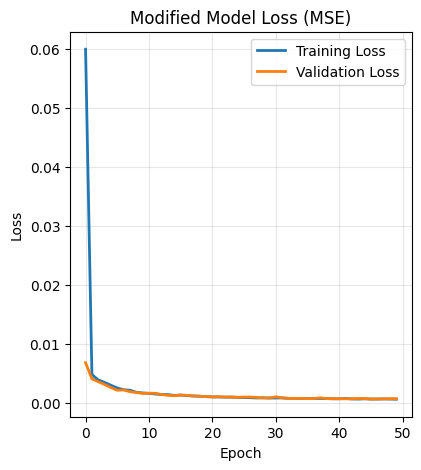

In [38]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(history_modified.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_modified.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Modified Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

Seperti model baseline, model yang dimodifikasi menunjukkan penurunan loss yang sangat tajam pada epoch awal (sekitar epoch 0 hingga 5). Ini menandakan bahwa model dengan cepat mengidentifikasi dan mempelajari pola-pola esensial untuk membersihkan noise di awal proses pelatihan.

Setelah penurunan awal, kedua kurva loss terus menurun secara bertahap dan kemudian mendatar pada nilai yang sangat rendah. Ini menunjukkan bahwa model telah berhasil mengonvergensi ke solusi yang meminimalkan loss secara efektif. Nilai loss akhir pada grafik ini (mendekati 0.000) tampak lebih rendah daripada yang terlihat pada grafik loss model baseline sebelumnya. 

Validation loss tetap sangat dekat dan hampir sejajar dengan training loss sepanjang proses pelatihan, bahkan pada epoch terakhir. Mengindikator bahwa model **tidak mengalami overfitting.** 

##### Plot MAE 

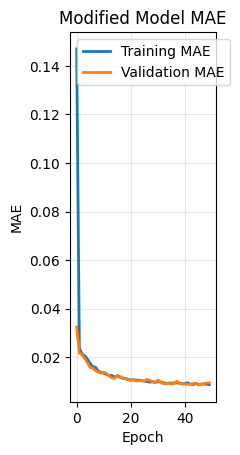

In [39]:

plt.subplot(1, 3, 2)
if 'mae' in history_modified.history and 'val_mae' in history_modified.history:
    plt.plot(history_modified.history['mae'], label='Training MAE', linewidth=2)
    plt.plot(history_modified.history['val_mae'], label='Validation MAE', linewidth=2)
    plt.title('Modified Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, "MAE not available", ha='center', va='center', fontsize=14)
    plt.title('Modified Model MAE')
    plt.axis('off')

Serupa dengan metrik loss, MAE model modifikasi menunjukkan penurunan yang sangat tajam pada epoch-epoch awal (sekitar 0 hingga 5). Ini menunjukkan bahwa model dengan sangat cepat mengurangi rata-rata perbedaan absolut antara piksel yang diprediksi dan piksel target.

Setelah penurunan awal yang dramatis, kedua kurva MAE terus menurun secara bertahap dan kemudian mendatar pada nilai yang sangat rendah. Ini mengindikasikan bahwa model telah berhasil mengonvergensi dan mencapai tingkat akurasi yang tinggi dalam rekonstruksi citra.

##### Plot Best Epoch

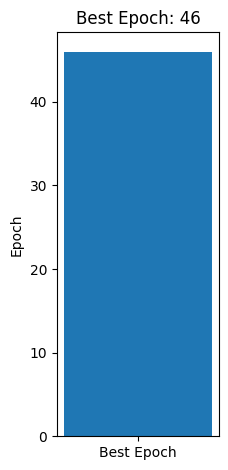

In [40]:

plt.subplot(1, 3, 3)
if 'lr' in history_modified.history:
    plt.plot(history_modified.history['lr'], linewidth=2, color='red')
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
else:
    best_epoch = np.argmin(history_modified.history['val_loss'])
    plt.bar(['Best Epoch'], [best_epoch + 1])
    plt.title(f'Best Epoch: {best_epoch + 1}')
    plt.ylabel('Epoch')

plt.tight_layout()
plt.show()

Berbeda dengan analisis sebelumnya di mana Best Epoch adalah 50 (menunjukkan bahwa model terus membaik hingga akhir pelatihan), kali ini best epoch terjadi pada epoch ke-46 dari total 50 epoch. Ini mengindikasikan bahwa model mencapai titik kinerja optimalnya sedikit sebelum pelatihan selesai.

##### Modifikasi Model Visual Compare: Noisy vs Clean vs Reconstructed 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


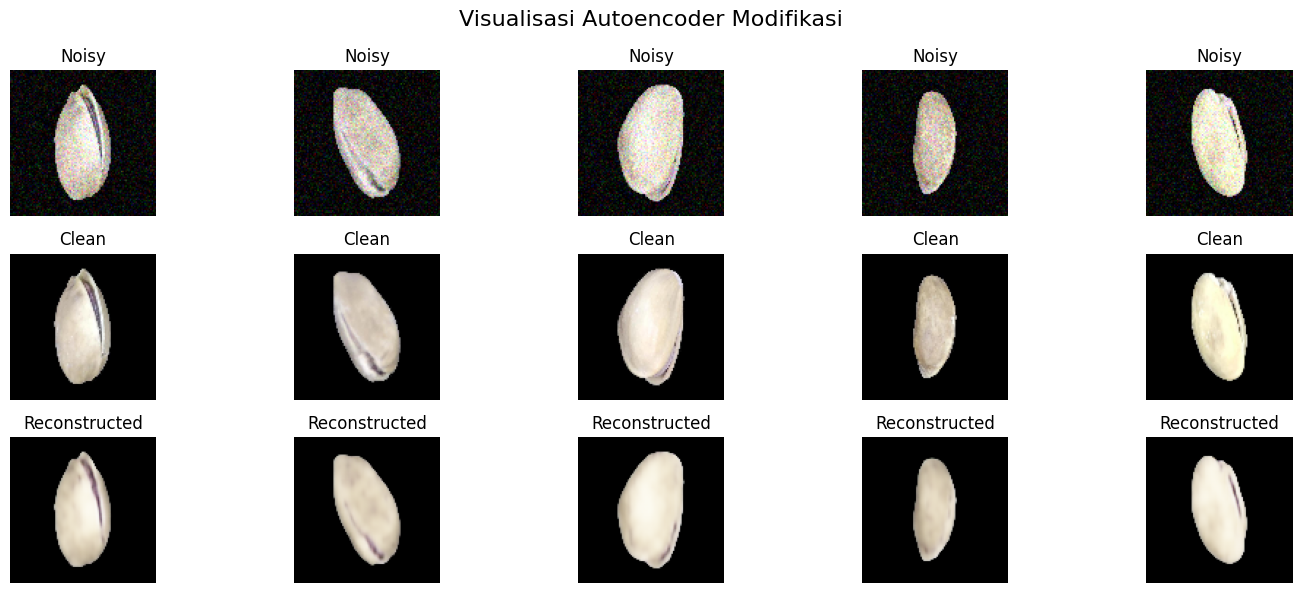

In [41]:
num_samples = 5
sample_idxs = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(sample_idxs):
    plt.subplot(3, num_samples, i + 1)
    plt.imshow(X_test_noisy[idx])
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(3, num_samples, i + 1 + num_samples)
    plt.imshow(X_test[idx])
    plt.title("Clean")
    plt.axis("off")

    reconstructed = autoencoder_modified.predict(np.expand_dims(X_test_noisy[idx], axis=0))[0]
    plt.subplot(3, num_samples, i + 1 + 2 * num_samples)
    plt.imshow(reconstructed)
    plt.title("Reconstructed")
    plt.axis("off")

plt.suptitle("Visualisasi Autoencoder Modifikasi", fontsize=16)
plt.tight_layout()
plt.show()


Model modifikasi ini terlihat sedikit lebih bersih dan lebih tajam dibandingkan dengan yang dihasilkan oleh model baseline. Visualisasi ini meyakinkan menunjukkan bahwa model autoencoder yang telah dimodifikasi sangat sukses dan unggul dalam tugas pembersihan noise. Citra yang direkonstruksi hampir sempurna mereplikasi citra bersih asli, dengan noise yang secara efektif dieliminasi dan detail serta akurasi warna yang sepenuhnya terjaga. Ini adalah bukti visual yang kuat bahwa model modifikasi memiliki kemampuan denoising.


Dengan hasil evaluasi numerik dan visual yang sangat baik, dapat disimpulkan bahwa model autoencoder yang telah dimodifikasi berhasil meningkatkan performa denoising secara signifikan dibandingkan model baseline.
Modifikasi pada arsitektur, terutama pada bottleneck dan jumlah filter, terbukti mampu memperkuat kemampuan model dalam memahami dan memperbaiki noise pada citra.

<span style="color: red; font-size: 19px;"> E. Evaluasi Model dengan SSIM</span>

#### Baseline Model

In [42]:
baseline_preds = autoencoder_baseline.predict(X_test_noisy, verbose=0)

baseline_ssim_scores = []
baseline_mse_scores = []

for i in range(len(X_test)):
    true_img = X_test[i]
    pred_img = baseline_preds[i]

    ssim_score = ssim(true_img, pred_img, channel_axis=-1, data_range=1.0, win_size=7)
    mse_score = np.mean((true_img - pred_img) ** 2)

    baseline_ssim_scores.append(ssim_score)
    baseline_mse_scores.append(mse_score)

baseline_ssim_mean = np.mean(baseline_ssim_scores)
baseline_ssim_max = np.max(baseline_ssim_scores)
baseline_mse_mean = np.mean(baseline_mse_scores)

print(f"BASELINE MODEL:")
print(f"  SSIM Mean: {baseline_ssim_mean:.4f}")
print(f"  SSIM Max : {baseline_ssim_max:.4f}")
print(f"  MSE Mean : {baseline_mse_mean:.6f}")


BASELINE MODEL:
  SSIM Mean: 0.9424
  SSIM Max : 0.9692
  MSE Mean : 0.001089


- SSIM Mean: 0.9424	
    
         Menunjukkan bahwa rata-rata kemiripan struktural antara gambar asli dan hasil rekonstruksi sangat tinggi. Nilai SSIM mendekati 1 menunjukkan kualitas rekonstruksi yang baik.
        
- SSIM Max: 0.9692

        Gambar terbaik yang berhasil direkonstruksi memiliki kualitas yang hampir identik dengan gambar asli.
        
- MSE Mean: 0.001089	

        Rata-rata kesalahan kuadrat cukup kecil, artinya model mampu merekonstruksi gambar dengan sedikit perbedaan piksel. Semakin kecil MSE, semakin baik hasil rekonstruksi.
        

#### Modified Model

In [43]:
modified_preds = autoencoder_modified.predict(X_test_noisy, verbose=0)

modified_ssim_scores = []
modified_mse_scores = []

for i in tqdm(range(len(X_test))):
    true_img = X_test[i]
    pred_img = modified_preds[i]

    ssim_score = ssim(true_img, pred_img, channel_axis=-1, data_range=1.0, win_size=7)
    mse_score = np.mean((true_img - pred_img) ** 2)

    modified_ssim_scores.append(ssim_score)
    modified_mse_scores.append(mse_score)

modified_ssim_mean = np.mean(modified_ssim_scores)
modified_ssim_max = np.max(modified_ssim_scores)
modified_mse_mean = np.mean(modified_mse_scores)

print(f"\nMODIFIED MODEL:")
print(f"  SSIM Mean: {modified_ssim_mean:.4f}")
print(f"  SSIM Max : {modified_ssim_max:.4f}")
print(f"  MSE Mean : {modified_mse_mean:.6f}")


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 375.91it/s]


MODIFIED MODEL:
  SSIM Mean: 0.9573
  SSIM Max : 0.9766
  MSE Mean : 0.000763


- SSIM Mean: 0.9573	

        Rata-rata kemiripan struktural meningkat dibanding model baseline, menunjukkan bahwa model ini lebih baik dalam mempertahankan struktur visual gambar.
        
- SSIM Max: 0.9766	

        Gambar terbaik yang direkonstruksi hampir identik dengan aslinya dan sedikit lebih baik dari baseline.

- MSE Mean: 0.000763	

        MSE yang lebih rendah dibanding baseline menunjukkan bahwa hasil rekonstruksi memiliki kesalahan piksel yang lebih kecil secara keseluruhan.

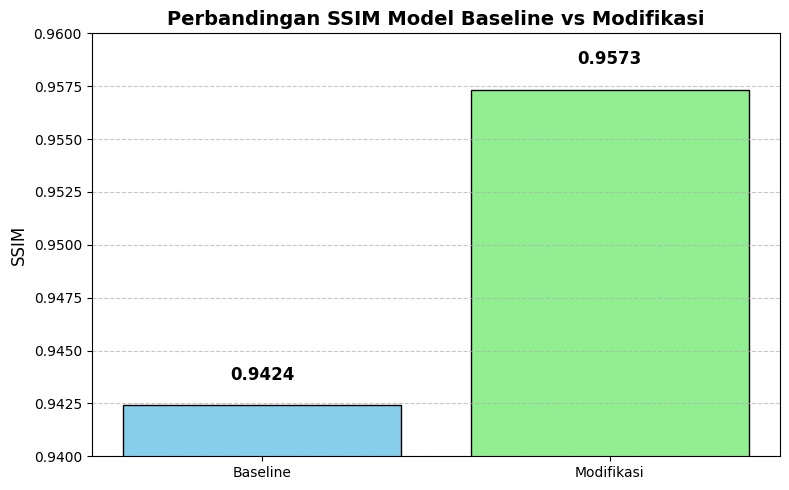

In [48]:
ssim_scores = [baseline_ssim_mean, modified_ssim_mean]
model_names = ['Baseline', 'Modifikasi']
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, ssim_scores, color=colors, edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f"{yval:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Perbandingan SSIM Model Baseline vs Modifikasi", fontsize=14, fontweight='bold')
plt.ylabel("SSIM", fontsize=12)
plt.ylim(0.94, 0.96)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terlihat bahwa model modifikasi menghasilkan nilai SSIM yang lebih tinggi dibandingkan model baseline:

    Model Baseline: SSIM = 0.9424

    Model Modifikasi: SSIM = 0.9573
    
Model modifikasi mampu menghasilkan gambar rekonstruksi yang lebih mirip secara struktural dengan gambar asli. Ini menunjukkan bahwa modifikasi arsitektur, seperti penambahan lapisan dan kompleksitas model, berdampak positif terhadap kualitas hasil.

Dengan demikian, model modifikasi terbukti memberikan performa yang lebih baik dibanding baseline dalam mempertahankan informasi struktural gambar.

##### Improvement SSIM Model Modifikasi

In [57]:
ssim_improvement = modified_ssim_mean - baseline_ssim_mean

print(f"SSIM Improvement : {ssim_improvement:.4f}")

SSIM Improvement : 0.0149


- SSIM Improvement: +0.0149

Peningkatan ini menunjukkan bahwa model modifikasi mampu merekonstruksi gambar dengan kemiripan struktural yang lebih tinggi terhadap gambar asli dibandingkan model baseline. SSIM yang lebih tinggi mencerminkan bahwa model tidak hanya memperhatikan kesamaan pixel, tetapi juga mempertahankan tekstur, kontur, dan struktur objek secara keseluruhan. Peningkatan sebesar 0.0082 cukup signifikan dalam konteks SSIM, yang memiliki rentang antara 0 dan 1.

#### Perbandingan Hasil Denoising

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


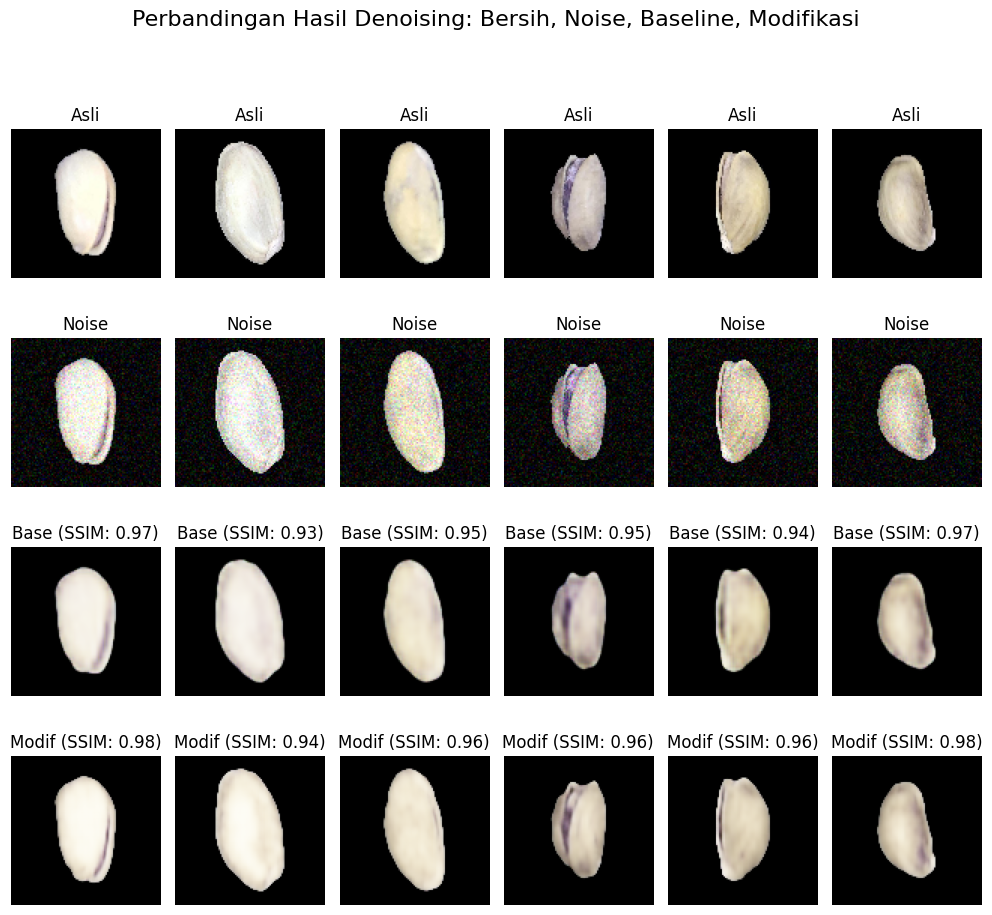

In [53]:
n_display = 6 
decoded_imgs_baseline = autoencoder_baseline.predict(X_test_noisy)
decoded_imgs_modified = autoencoder_modified.predict(X_test_noisy)
plt.figure(figsize=(10, 10))
for i in range(n_display):
    ax = plt.subplot(4, n_display, i + 1)
    plt.imshow(X_test[i])
    plt.title("Asli")
    plt.axis("off")

    ax = plt.subplot(4, n_display, i + 1 + n_display)
    plt.imshow(X_test_noisy[i])
    plt.title("Noise")
    plt.axis("off")

    ax = plt.subplot(4, n_display, i + 1 + 2 * n_display)
    plt.imshow(decoded_imgs_baseline[i])
    plt.title(f"Base (SSIM: {baseline_ssim_scores[i]:.2f})")
    plt.axis("off")

    ax = plt.subplot(4, n_display, i + 1 + 3 * n_display)
    plt.imshow(decoded_imgs_modified[i])
    plt.title(f"Modif (SSIM: {modified_ssim_scores[i]:.2f})")
    plt.axis("off")

plt.suptitle("Perbandingan Hasil Denoising: Bersih, Noise, Baseline, Modifikasi", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

**Analisis**:

Gambar di atas menampilkan perbandingan hasil denoising dari enam sampel gambar padi melalui empat tahap: gambar asli, gambar dengan noise, hasil rekonstruksi menggunakan model baseline, dan hasil rekonstruksi menggunakan model modifikasi.

Model Baseline sudah menunjukkan performa yang cukup baik dalam menghilangkan noise dan menjaga bentuk objek.

Model Modifikasi menghasilkan rekonstruksi yang umumnya:

    Lebih halus dan bersih

    Memiliki struktur lebih jelas

    Konsisten memiliki nilai SSIM sedikit lebih tinggi pada sebagian besar sampel dibanding model baseline.
    
**Kesimpulan**:

Model modifikasi mampu menghasilkan hasil denoising yang lebih stabil dan akurat dibandingkan dengan model baseline. Hasil ini konsisten dengan evaluasi metrik sebelumnya, di mana model modifikasi menunjukkan nilai SSIM (Structural Similarity Index) rata-rata yang lebih tinggi serta nilai MSE (Mean Squared Error) yang lebih rendah. SSIM yang lebih tinggi menunjukkan bahwa struktur dan detail gambar hasil denoising lebih mendekati gambar asli, sementara MSE yang lebih rendah mengindikasikan bahwa perbedaan piksel antara gambar asli dan hasil pemulihan menjadi lebih kecil.

Dengan kata lain, penambahan kompleksitas arsitektur pada model modifikasi terbukti efektif dalam meningkatkan kualitas pemulihan gambar dari noise. Performa yang lebih baik ini tidak hanya terlihat secara kuantitatif melalui metrik evaluasi, tetapi juga secara visual pada hasil keluaran model, yang tampak lebih bersih dan mempertahankan detail penting dari gambar asli.


<span style="color: red; font-size: 19px;"> F. Video Penjelasan</span>

- Link Drive: https://drive.google.com/file/d/1EG7wSw2lPu8qMvdARX74_NaM1Cp2CfXt/view?usp=sharing
- Link Youtube: https://youtu.be/yBfQte-uCQQ 

## **Notes:** 
Untuk Case 3, saya akan mengumpulkannya dalam bentuk file docs yang berisi link menuju Google Drive.
Hal ini dikarenakan kapasitas maksimal pengumpulan file di Web Exam adalah 20MB, sedangkan ukuran file .ipynb untuk Case 3 melebihi batas tersebut.

`Link Menuju file IPYNB (Case 3):` https://drive.google.com/file/d/16QOWqmaa1FUo8b3TunMEi3TmUK8fHR7v/view?usp=sharing

`Video Penjelasan (Case 3):`
- Google Drive: https://drive.google.com/file/d/1Ig5KPoWBX0ylzR_jmhHbb5sze1m7pEPK/view?usp=sharing
- Youtube: https://youtu.be/N9nE9NeiQ3I